In [4]:
# Librerías para ciencia de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Hotel Booking Dataset – Descripción de los features

| Feature | Description |
|--------|-------------|
| hotel | Hotel type: H1 = Resort Hotel, H2 = City Hotel |
| is_canceled | Whether the booking was canceled (1=yes, 0=no) |
| lead_time | Days between booking and arrival |
| arrival_date_year | Arrival year |
| arrival_date_month | Arrival month (string) |
| arrival_date_week_number | Week number of arrival date |
| arrival_date_day_of_month | Day of month of arrival date |
| stays_in_weekend_nights | Weekend nights (Sat–Sun) stayed or booked |
| stays_in_week_nights | Week nights (Mon–Fri) stayed or booked |
| adults | Number of adults |
| children | Number of children |
| babies | Number of babies |
| meal | Meal type (SC, BB, HB, FB) |
| country | Country of origin (ISO 3155–3) |
| market_segment | Market segment (TA = Travel Agents, TO = Tour Operators) |
| distribution_channel | Distribution channel (TA = Travel Agents, TO = Tour Operators) |
| is_repeated_guest | Whether guest is repeated (1=yes, 0=no) |
| previous_cancellations | Number of previous cancellations |
| previous_bookings_not_canceled | Number of previous non-canceled bookings |
| reserved_room_type | Reserved room code (anonymized) |
| assigned_room_type | Assigned room code (may differ from reserved) |
| booking_changes | Number of changes made to the booking |
| deposit_type | Deposit type (No Deposit, Non Refund, Refundable) |
| agent | Travel agency ID |
| company | Company/Entity ID responsible for booking |
| days_in_waiting_list | Days the booking was on waiting list |
| customer_type | Booking type (Contract, Group, Transient, Transient-party) |
| adr | Average Daily Rate |
| required_car_parking_spaces | Required parking spaces |
| total_of_special_requests | Count of special requests |
| reservation_status | Final status (Canceled, Check-Out, No-Show) |
| reservation_status_date | Date of last reservation status update |


In [5]:
# la demanda / se calcula en los hoteles por dia no por reserva, tenemos que ajsutar los datos

In [6]:
# Importar el csv
df = pd.read_csv('/Users/mirandag/Documents/BI/Sin título/hotel_bookings.csv')

In [7]:
# Observamos el tipo de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# Observamos la estructura del dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
# Valores nulos
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
# Borra las instancias donde children sea Nan
df.dropna(subset=['children'], inplace=True)

# Borra las instancias donde country es NA
df.dropna(subset=['country'], inplace=True)

In [11]:
# Mostramos la estructura de los features realacionados a la fecha
df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].head()

,arrival_date_year,arrival_date_month,arrival_date_day_of_month
0,2015,July,1
1,2015,July,1
2,2015,July,1
3,2015,July,1
4,2015,July,1


In [12]:
# Juntamos las columnas y reducimos la dimensionalidad para tener solo una columna de fecha
df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str)

# Organizamos la nueva columna para dejarla como estaban las columnas relacionadas a la fecha
cols = list(df.columns)
cols.insert(3, cols.pop(cols.index('arrival_date')))
df = df.loc[:, cols]

# Borramos las columnas de fecha originales
#df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', "agent", "company"], axis=1, inplace=True)

In [13]:
# Cambia el tipo de arrival_date a date time
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Cambia el tipo de is_canceled a bool
df['is_canceled'] = df['is_canceled'].astype(bool)
df['is_repeated_guest'] = df['is_repeated_guest'].astype(bool)

# Cambia el tipo de children a int
df['children'] = df['children'].astype(int)

In [14]:
df['arrival_date'].head()

0   2015-07-01
1   2015-07-01
2   2015-07-01
3   2015-07-01
4   2015-07-01
Name: arrival_date, dtype: datetime64[ns]

In [15]:
# Verificamos que el tipo de datos sea correcto y no haya valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  bool          
 2   lead_time                       118898 non-null  int64         
 3   arrival_date                    118898 non-null  datetime64[ns]
 4   arrival_date_year               118898 non-null  int64         
 5   arrival_date_month              118898 non-null  object        
 6   arrival_date_week_number        118898 non-null  int64         
 7   arrival_date_day_of_month       118898 non-null  int64         
 8   stays_in_weekend_nights         118898 non-null  int64         
 9   stays_in_week_nights            118898 non-null  int64         
 10  adults                          118898 non-null  int64       

In [16]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date                           0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent           

In [17]:
df.head()

,hotel,is_canceled,lead_time,arrival_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,False,342,2015-07-01,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,False,737,2015-07-01,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,False,7,2015-07-01,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,False,13,2015-07-01,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,False,14,2015-07-01,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [341]:
# Eliminamos algunas columnas que consideramos no eran útiles para nuestro análisis y entrenamiento
df.drop(['booking_changes', 'reservation_status', 'reservation_status_date', 'required_car_parking_spaces', 'total_of_special_requests'], axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  bool          
 2   lead_time                       118898 non-null  int64         
 3   arrival_date                    118898 non-null  datetime64[ns]
 4   arrival_date_year               118898 non-null  int64         
 5   arrival_date_month              118898 non-null  object        
 6   arrival_date_week_number        118898 non-null  int64         
 7   arrival_date_day_of_month       118898 non-null  int64         
 8   stays_in_weekend_nights         118898 non-null  int64         
 9   stays_in_week_nights            118898 non-null  int64         
 10  adults                          118898 non-null  int64       

In [19]:
# features cuantitativas
df.describe(include='number')


,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,102894.000000,6623.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.087142,0.131634,0.221181,86.545532,189.624792,2.330754,102.003243,0.061885,0.571683
std,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.845869,1.484672,0.652785,110.714259,132.124298,17.630452,50.485862,0.244172,0.792678
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,70.000000,0.000000,0.000000
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,95.000000,0.000000,0.000000
75%,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [20]:
df.select_dtypes(include='number').columns


Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

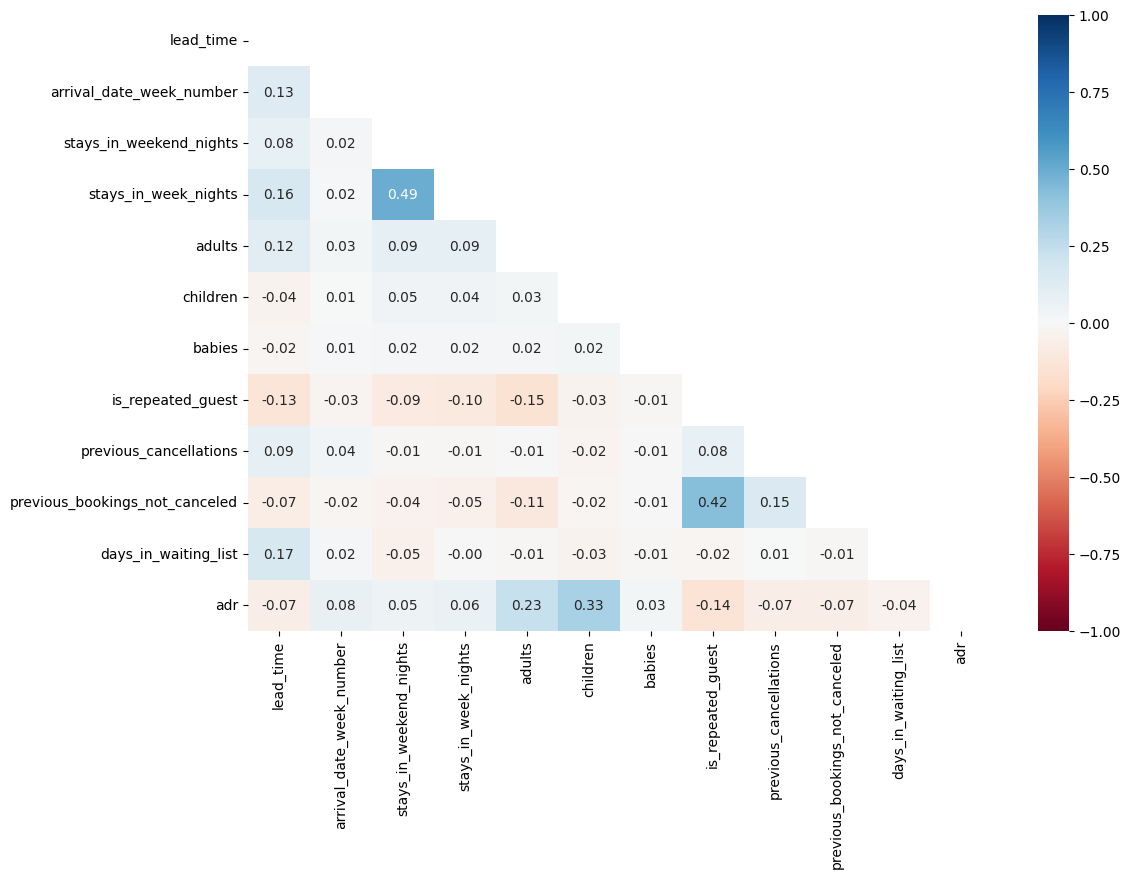

In [21]:
# Lista de features numéricos (SIN assigned_room_type y reserved_room_type)
num_features = [ 'lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', "children", "babies", "is_repeated_guest", "previous_cancellations", "previous_bookings_not_canceled", 'days_in_waiting_list',"adr"]

# Matriz de correlacion con num_features y muestrala
corr_matrix = df[num_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", vmin=-1, vmax=1, mask=np.triu(corr_matrix), cmap="RdBu")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

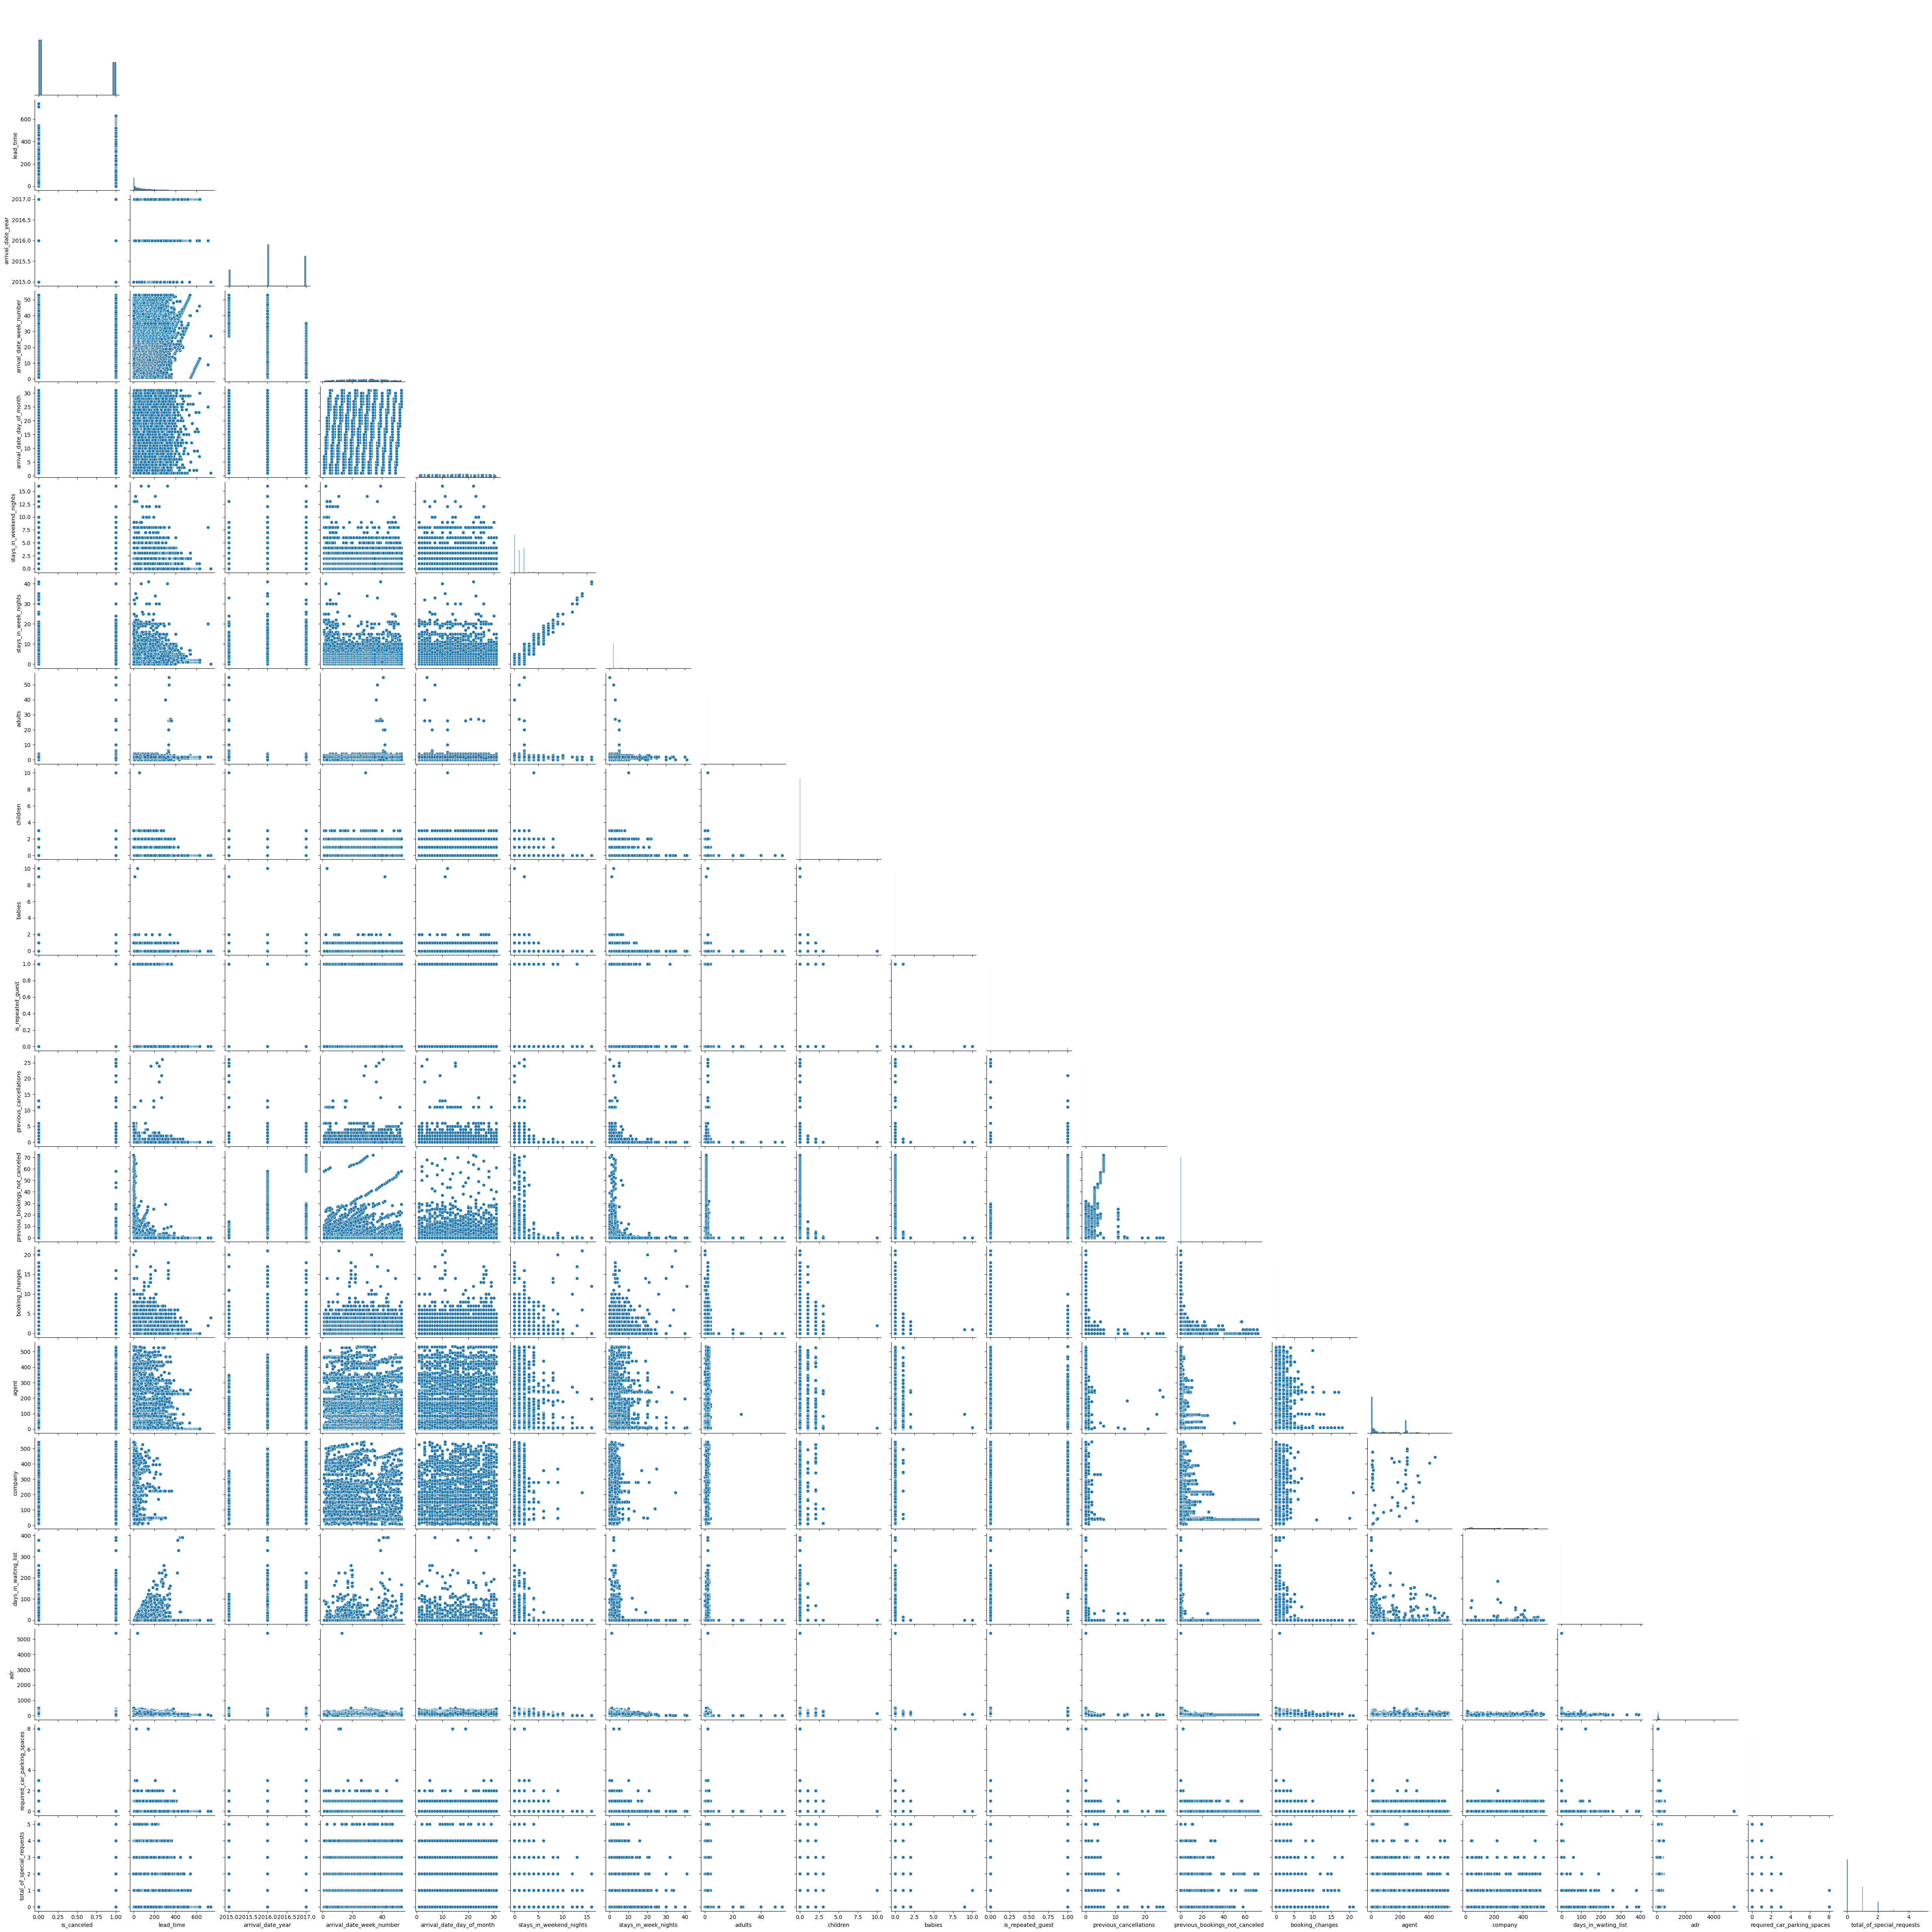

In [22]:
# Matriz de gráficos
sns.pairplot(data=df, corner="True")
plt.show

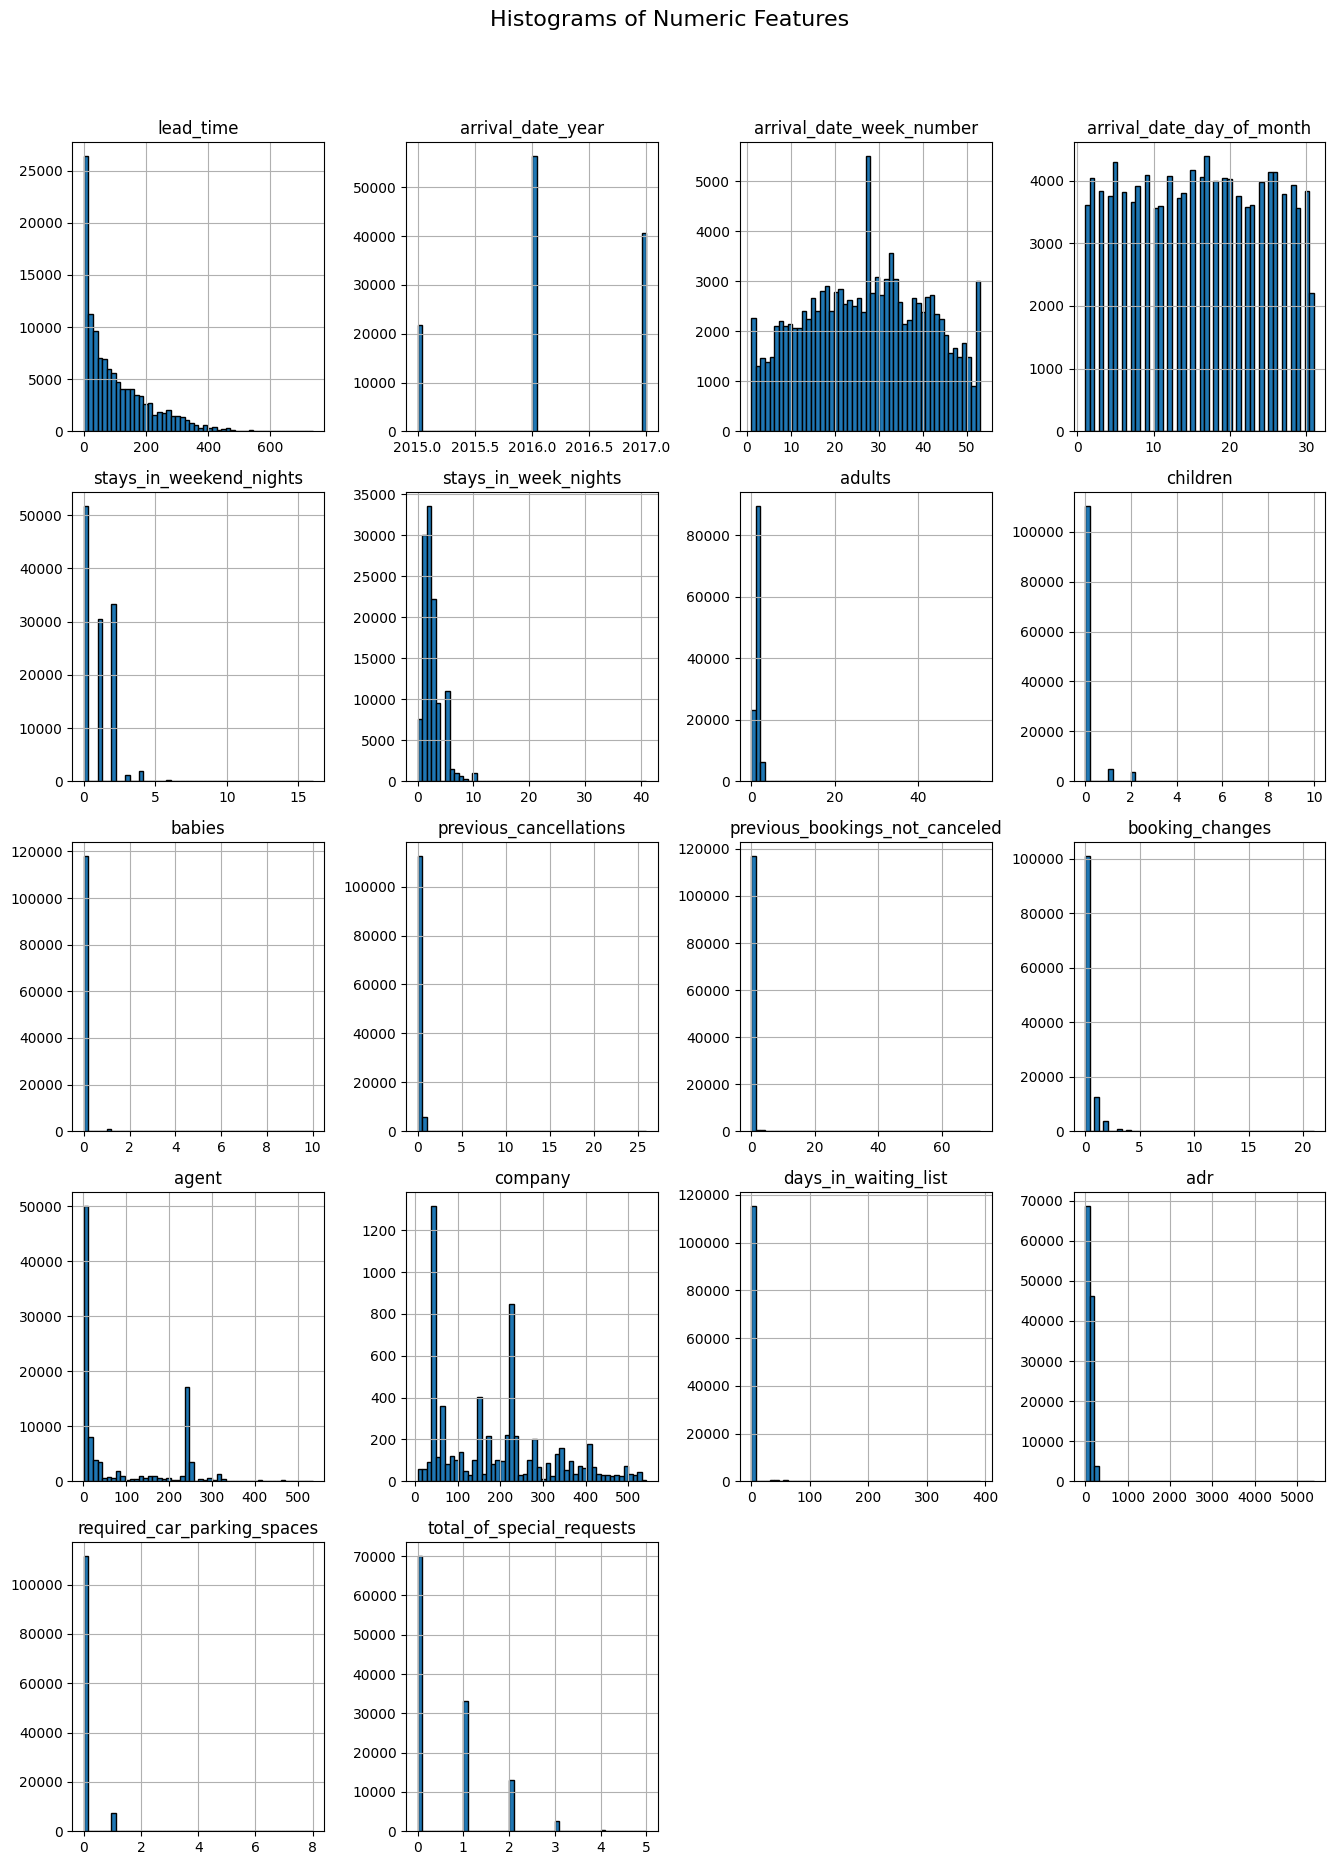

In [23]:
col_numericas = df.select_dtypes(include=['int64', 'float64']).columns
df[col_numericas].hist(bins=50, figsize=(15, 20), edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
plt.show()


Los hoteles no analisan las demandas por reservas, si no cuantos cuartos estan ocupados por dia 

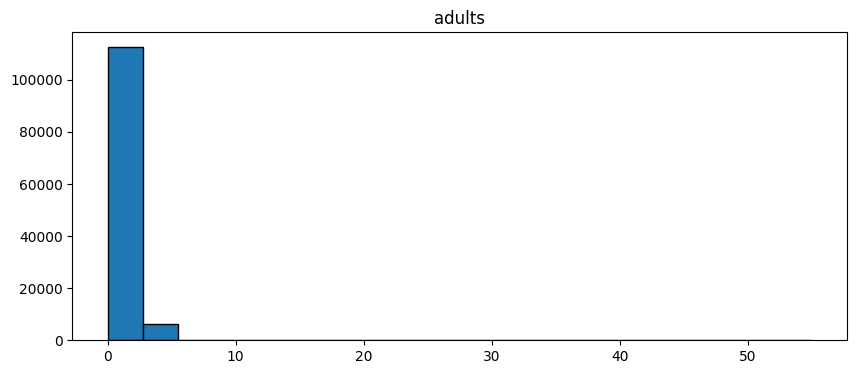

In [25]:


plt.figure(figsize=(10,4))
plt.hist(df['adults'], bins=20, edgecolor='black')
plt.title('adults')
plt.show()

In [26]:
df = df[df['adults'] > 0] # no hay adultos son 25.. registros pocos
df = df[(df['adults'] + df['children'] + df['babies']) > 0] # eliminamos los bookings

In [27]:
# si una reserva se cancela no se va a ocupar el cuarot entonces no cuenta para la demanda solo nos quedamos con los que si se ocuparon 

In [28]:
df = df[df['is_canceled'] == 0]

In [29]:
# ya tenemos al fecha de llegada 

df['arrival_date'].head()

0   2015-07-01
1   2015-07-01
2   2015-07-01
3   2015-07-01
4   2015-07-01
Name: arrival_date, dtype: datetime64[ns]

In [30]:
df[['stays_in_week_nights', 'stays_in_weekend_nights']].head(10) # estas dos estsan correlacionadas 



,stays_in_week_nights,stays_in_weekend_nights
0,0,0
1,0,0
2,1,0
3,1,0
4,2,0
5,2,0
6,2,0
7,2,0
11,4,0
12,4,0


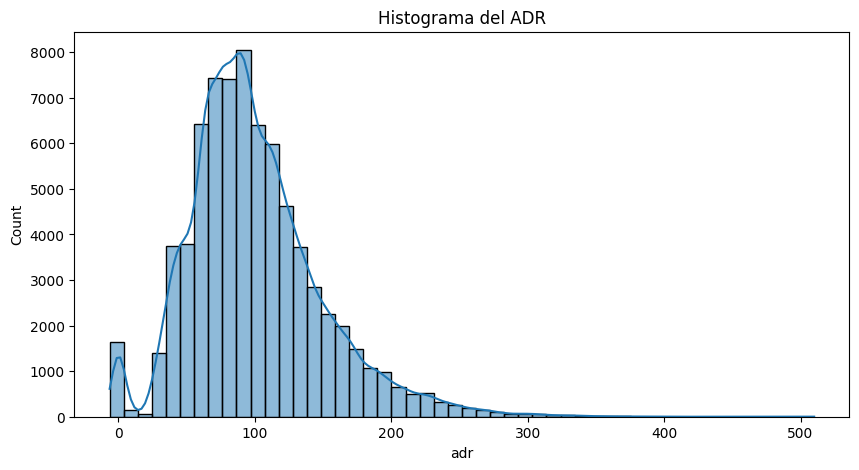

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(df["adr"], bins=50, kde=True)
plt.title("Histograma del ADR")
plt.show()

In [32]:
df = df[(df['adr'] > 0) & (df['adr'] < 1000)]

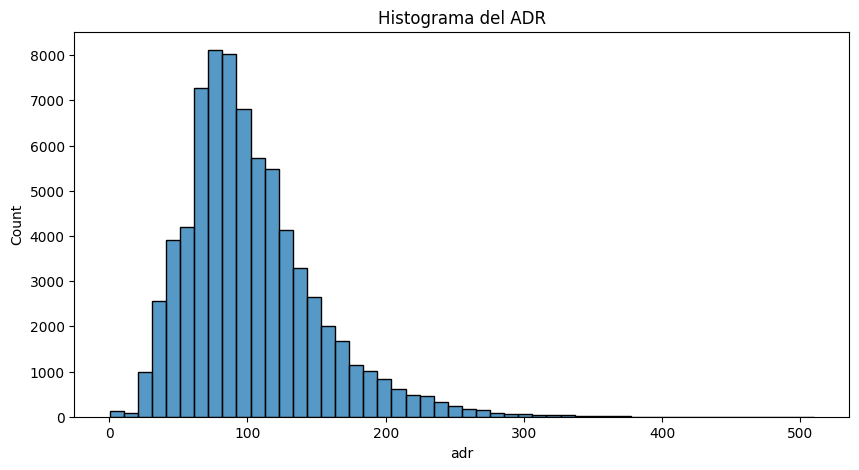

In [33]:
plt.figure(figsize=(10,5))
sns.histplot(df["adr"], bins=50)
plt.title("Histograma del ADR")
plt.show()

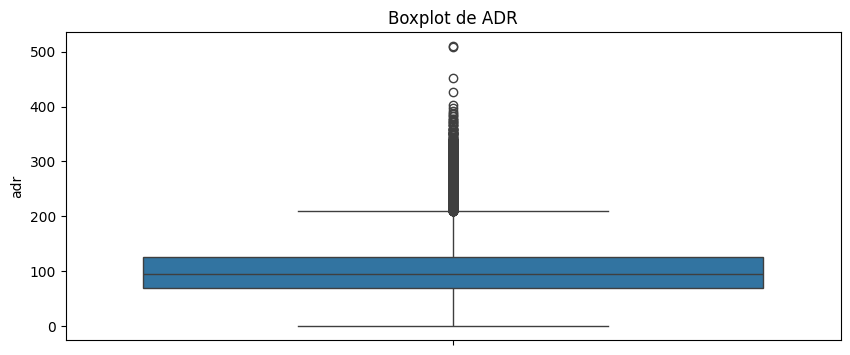

In [34]:
plt.figure(figsize=(10,4))
sns.boxplot(y=df['adr'])
plt.title("Boxplot de ADR")
plt.show()


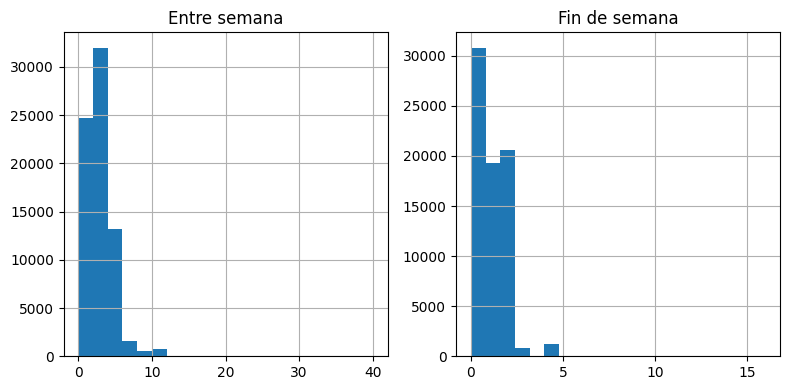

In [35]:


plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
df['stays_in_week_nights'].hist(bins=20)
plt.title("Entre semana")

plt.subplot(1,2,2)
df['stays_in_weekend_nights'].hist(bins=20)
plt.title("Fin de semana")

plt.tight_layout()
plt.show()


In [36]:
# los hoteloes no cobra por tipod e dia ya sea entre semana o en fin de semana , lo ahce por noche, las juntamos
df['stay_length'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df['stay_length'].head()

2    1
3    1
4    2
5    2
6    2
Name: stay_length, dtype: int64

In [37]:
df[['arrival_date', 'arrival_date_month','stay_length']].head(10) #cuantas reservas hay por dia / pero necesitamos asber cuantos cuartos estan ocupados 

,arrival_date,arrival_date_month,stay_length
2,2015-07-01,July,1
3,2015-07-01,July,1
4,2015-07-01,July,2
5,2015-07-01,July,2
6,2015-07-01,July,2
7,2015-07-01,July,2
11,2015-07-01,July,4
12,2015-07-01,July,4
13,2015-07-01,July,4
14,2015-07-01,July,4


In [38]:
# lista de dias ocupados por  cada reserva 

# los días ocupados por cada reserva
df['fechas_estadia'] = df.apply(
    lambda fila: pd.date_range(start=fila['arrival_date'], periods=fila['stay_length'], freq='D'),
    axis=1
)

# una reserva se separa en varios dias
df_dias = df.explode('fechas_estadia').reset_index(drop=True)


df_dias[['arrival_date', 'fechas_estadia', 'stay_length']].head(10)



,arrival_date,fechas_estadia,stay_length
0,2015-07-01,2015-07-01,1
1,2015-07-01,2015-07-01,1
2,2015-07-01,2015-07-01,2
3,2015-07-01,2015-07-02,2
4,2015-07-01,2015-07-01,2
5,2015-07-01,2015-07-02,2
6,2015-07-01,2015-07-01,2
7,2015-07-01,2015-07-02,2
8,2015-07-01,2015-07-01,2
9,2015-07-01,2015-07-02,2


In [39]:
demanda_diaria = (
    df_dias.groupby(['fechas_estadia', 'hotel','reserved_room_type'])
    .agg(
        habitaciones_ocupadas=('fechas_estadia','count'),
        tarifa_promedio=('adr','mean')
    )
    .reset_index()
)

demanda_diaria.rename(columns={'fechas_estadia':'fecha'}, inplace=True)
demanda_diaria.head()


,fecha,hotel,reserved_room_type,habitaciones_ocupadas,tarifa_promedio
0,2015-07-01,City Hotel,A,64,96.5625
1,2015-07-01,Resort Hotel,A,15,85.9120
2,2015-07-01,Resort Hotel,C,2,105.0000
3,2015-07-01,Resort Hotel,D,10,98.0880
4,2015-07-01,Resort Hotel,E,2,96.1050


In [41]:
demanda_diaria['mes'] = demanda_diaria['fecha'].dt.month
demanda_diaria['dia_semana'] = demanda_diaria['fecha'].dt.day_name()
demanda_diaria.head()

,fecha,hotel,reserved_room_type,habitaciones_ocupadas,tarifa_promedio,mes,dia_semana
0,2015-07-01,City Hotel,A,64,96.5625,7,Wednesday
1,2015-07-01,Resort Hotel,A,15,85.9120,7,Wednesday
2,2015-07-01,Resort Hotel,C,2,105.0000,7,Wednesday
3,2015-07-01,Resort Hotel,D,10,98.0880,7,Wednesday
4,2015-07-01,Resort Hotel,E,2,96.1050,7,Wednesday


In [42]:
demanda_diaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8994 entries, 0 to 8993
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha                  8994 non-null   datetime64[ns]
 1   hotel                  8994 non-null   object        
 2   reserved_room_type     8994 non-null   object        
 3   habitaciones_ocupadas  8994 non-null   int64         
 4   tarifa_promedio        8994 non-null   float64       
 5   mes                    8994 non-null   int32         
 6   dia_semana             8994 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(3)
memory usage: 456.9+ KB


DEMANDA POR HOTEL

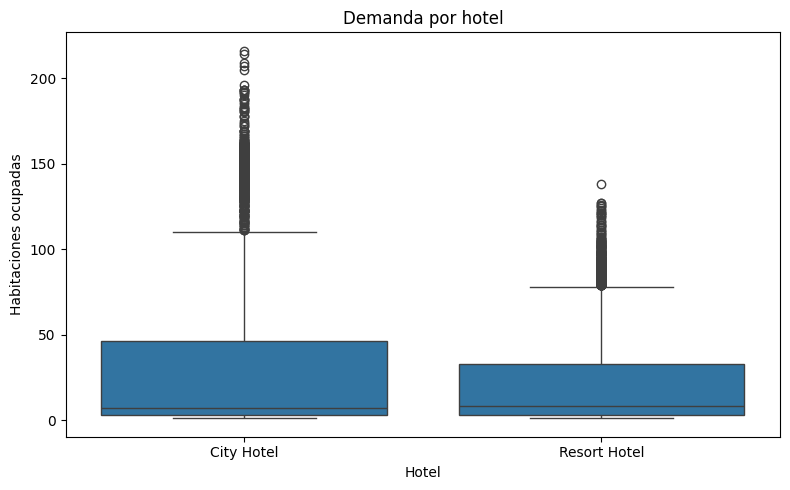

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(data=demanda_diaria, x='hotel', y='habitaciones_ocupadas')
plt.title('Demanda por hotel')
plt.xlabel('Hotel')
plt.ylabel('Habitaciones ocupadas')
plt.tight_layout()
plt.show()


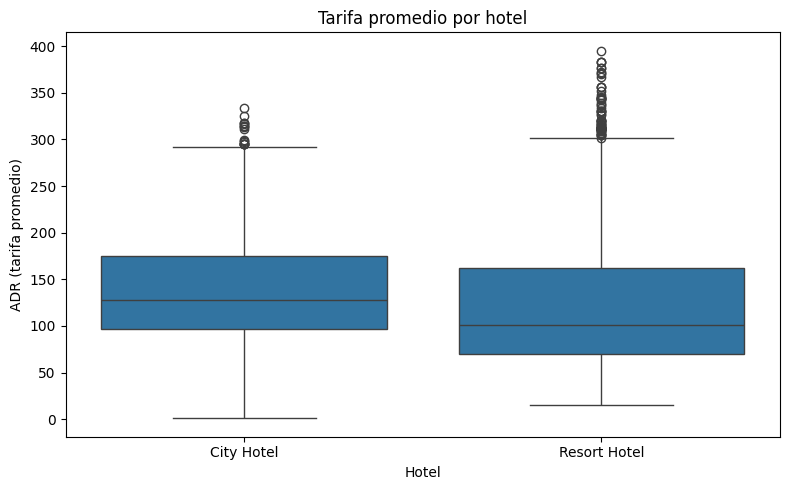

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(data=demanda_diaria, x='hotel', y='tarifa_promedio')
plt.title('Tarifa promedio por hotel')
plt.xlabel('Hotel')
plt.ylabel('ADR (tarifa promedio)')
plt.tight_layout()
plt.show()


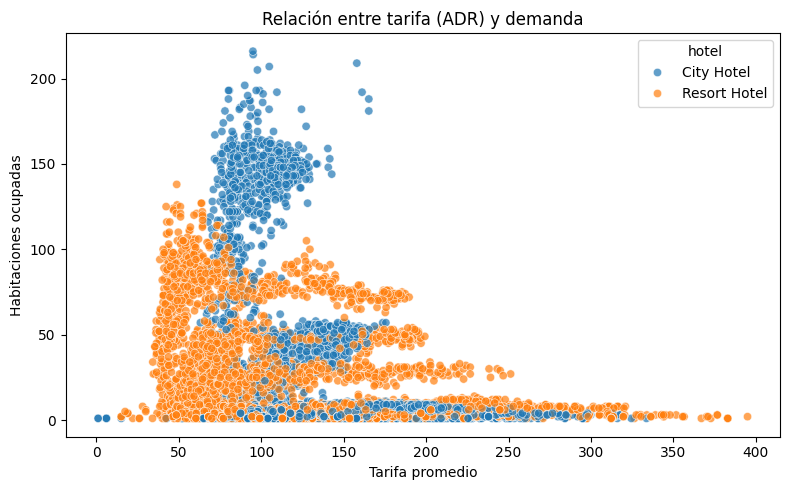

In [45]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=demanda_diaria,
    x='tarifa_promedio',
    y='habitaciones_ocupadas',
    hue='hotel',
    alpha=0.7
)
plt.title('Relación entre tarifa (ADR) y demanda')
plt.xlabel('Tarifa promedio')
plt.ylabel('Habitaciones ocupadas')
plt.tight_layout()
plt.show()


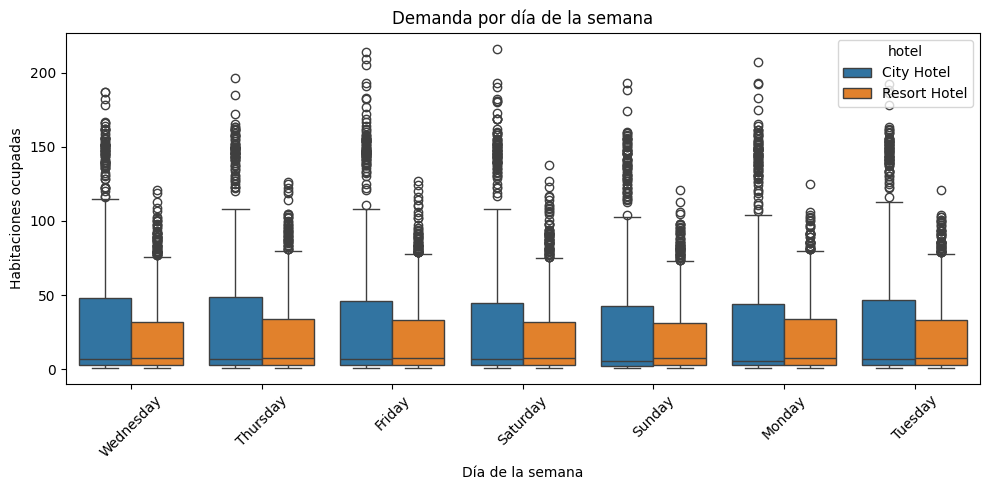

In [46]:
plt.figure(figsize=(10,5))
sns.boxplot(data=demanda_diaria, x='dia_semana', y='habitaciones_ocupadas', hue='hotel')
plt.title('Demanda por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Habitaciones ocupadas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


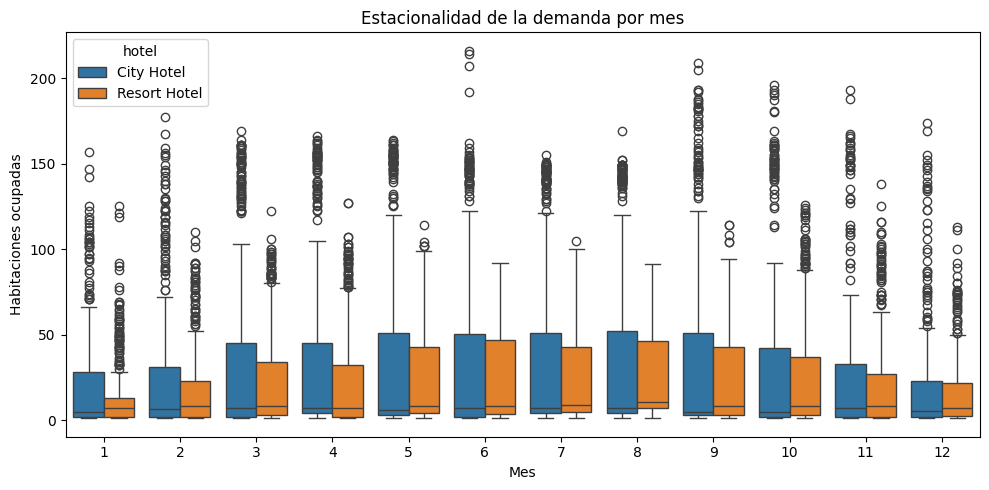

In [47]:
plt.figure(figsize=(10,5))
sns.boxplot(data=demanda_diaria, x='mes', y='habitaciones_ocupadas', hue='hotel')
plt.title('Estacionalidad de la demanda por mes')
plt.xlabel('Mes')
plt.ylabel('Habitaciones ocupadas')
plt.tight_layout()
plt.show()


In [48]:
# 1. Copia de tu dataset original diario
df_feat = demanda_diaria.copy()

# 2. Crear lags (memoria)
df_feat['lag_1'] = df_feat['habitaciones_ocupadas'].shift(1)
df_feat['lag_7'] = df_feat['habitaciones_ocupadas'].shift(7)
df_feat['lag_14'] = df_feat['habitaciones_ocupadas'].shift(14)

# 3. Crear tendencia (rolling mean)
df_feat['rolling_7'] = df_feat['habitaciones_ocupadas'].rolling(7).mean()
df_feat['rolling_14'] = df_feat['habitaciones_ocupadas'].rolling(14).mean()

# 4. Eliminar filas con NaN (las primeras semanas)
df_feat = df_feat.dropna()

# 5. Convertir día de semana a número
df_feat['dia_semana'] = df_feat['dia_semana'].astype('category').cat.codes

# 6. Definir variables (incluimos ADR porque elegiste elasticidad)
X = df_feat[['tarifa_promedio', 'mes', 'dia_semana',
             'lag_1', 'lag_7', 'lag_14', 'rolling_7', 'rolling_14']]

y = df_feat['habitaciones_ocupadas']

# 7. Train / Test (sin shuffle)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

modelo = LinearRegression()
modelo.fit(X_train, y_train)

pred = modelo.predict(X_test)

print("R²:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))


R²: 0.5043787242713281
MAE: 20.35091678612017


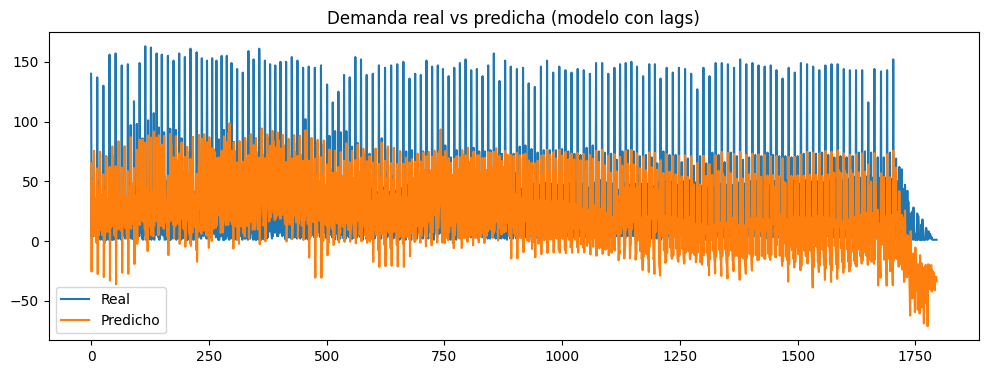

In [50]:
plt.figure(figsize=(12,4))
plt.plot(y_test.values, label='Real')
plt.plot(pred, label='Predicho')
plt.title('Demanda real vs predicha (modelo con lags)')
plt.legend()
plt.show()


In [51]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Modelo XGBoost (parámetros equilibrados)
modelo_xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

modelo_xgb.fit(X_train, y_train)

pred_xgb = modelo_xgb.predict(X_test)

print("R²:", r2_score(y_test, pred_xgb))
print("MAE:", mean_absolute_error(y_test, pred_xgb))


R²: 0.8694357872009277
MAE: 7.605855941772461


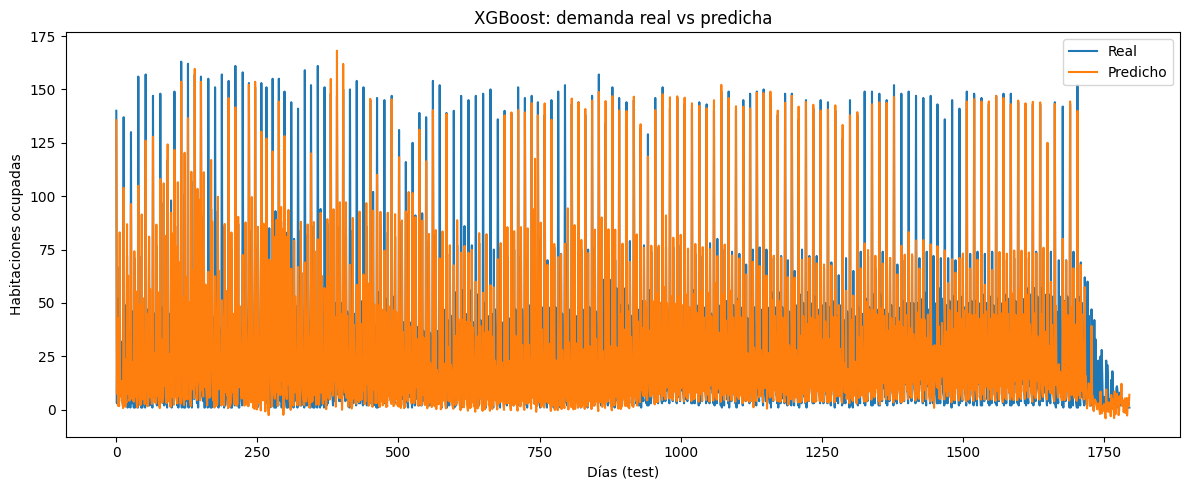

In [52]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values, label='Real')
plt.plot(pred_xgb, label='Predicho')
plt.title('XGBoost: demanda real vs predicha')
plt.xlabel('Días (test)')
plt.ylabel('Habitaciones ocupadas')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
cahnse sirve para otra cosa 

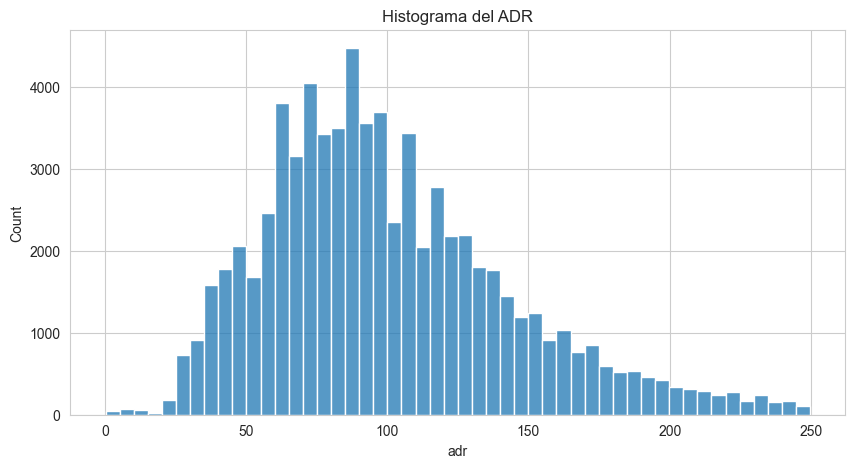

In [373]:
plt.figure(figsize=(10,5))
sns.histplot(df["adr"], bins=50)
plt.title("Histograma del ADR")
plt.show()

In [374]:
total = len(df_original)
limpio = len(df)
eliminados = total - limpio
porcentaje = (eliminados / total) * 100

print(f"Registros que borramos: {eliminados}")
print(f"Porcentaje equivalente: {porcentaje:.2f}%")

Registros que borramos: 818
Porcentaje equivalente: 1.12%


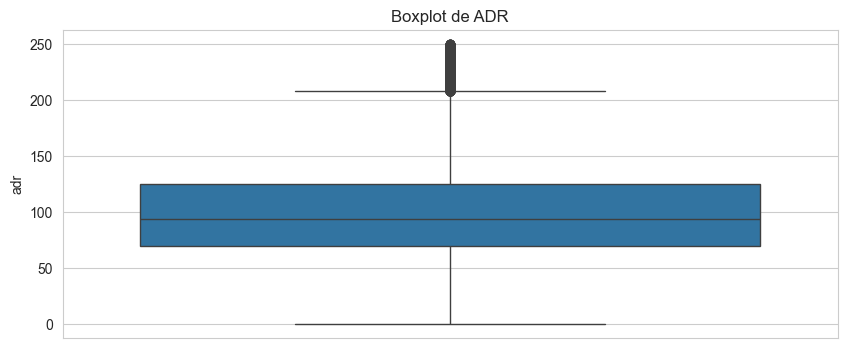

In [375]:
plt.figure(figsize=(10,4))
sns.boxplot(y=df['adr'])
plt.title("Boxplot de ADR")
plt.show()


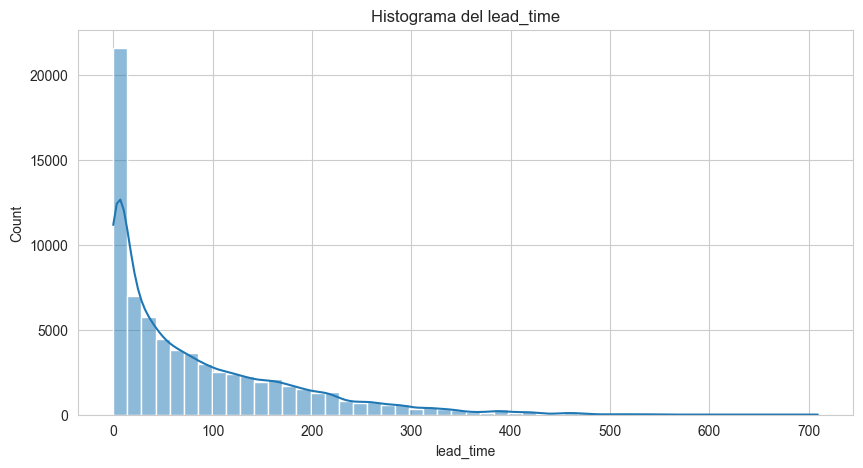

In [376]:
plt.figure(figsize=(10,5))
sns.histplot(df["lead_time"], bins=50, kde=True)
plt.title("Histograma del lead_time")
plt.show()

In [377]:
df = df[(df['lead_time'] > 0) & (df['lead_time'] < 365)]

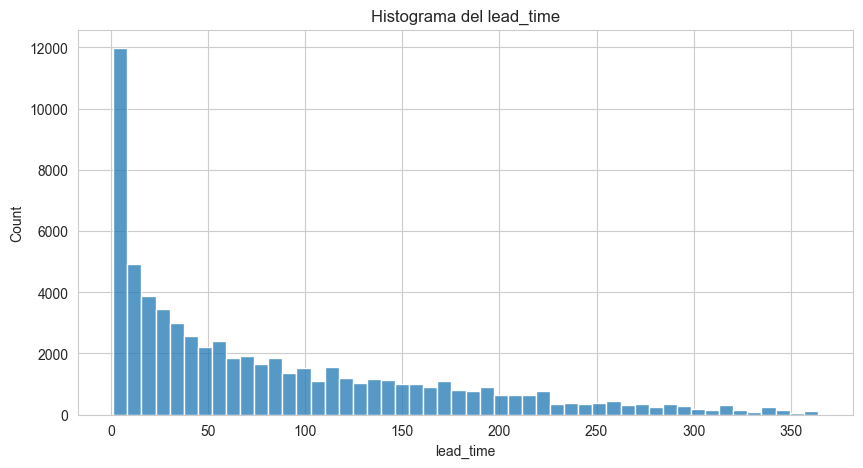

In [378]:
plt.figure(figsize=(10,5))
sns.histplot(df["lead_time"], bins=50)
plt.title("Histograma del lead_time")
plt.show()

<Axes: xlabel='adults', ylabel='adr'>

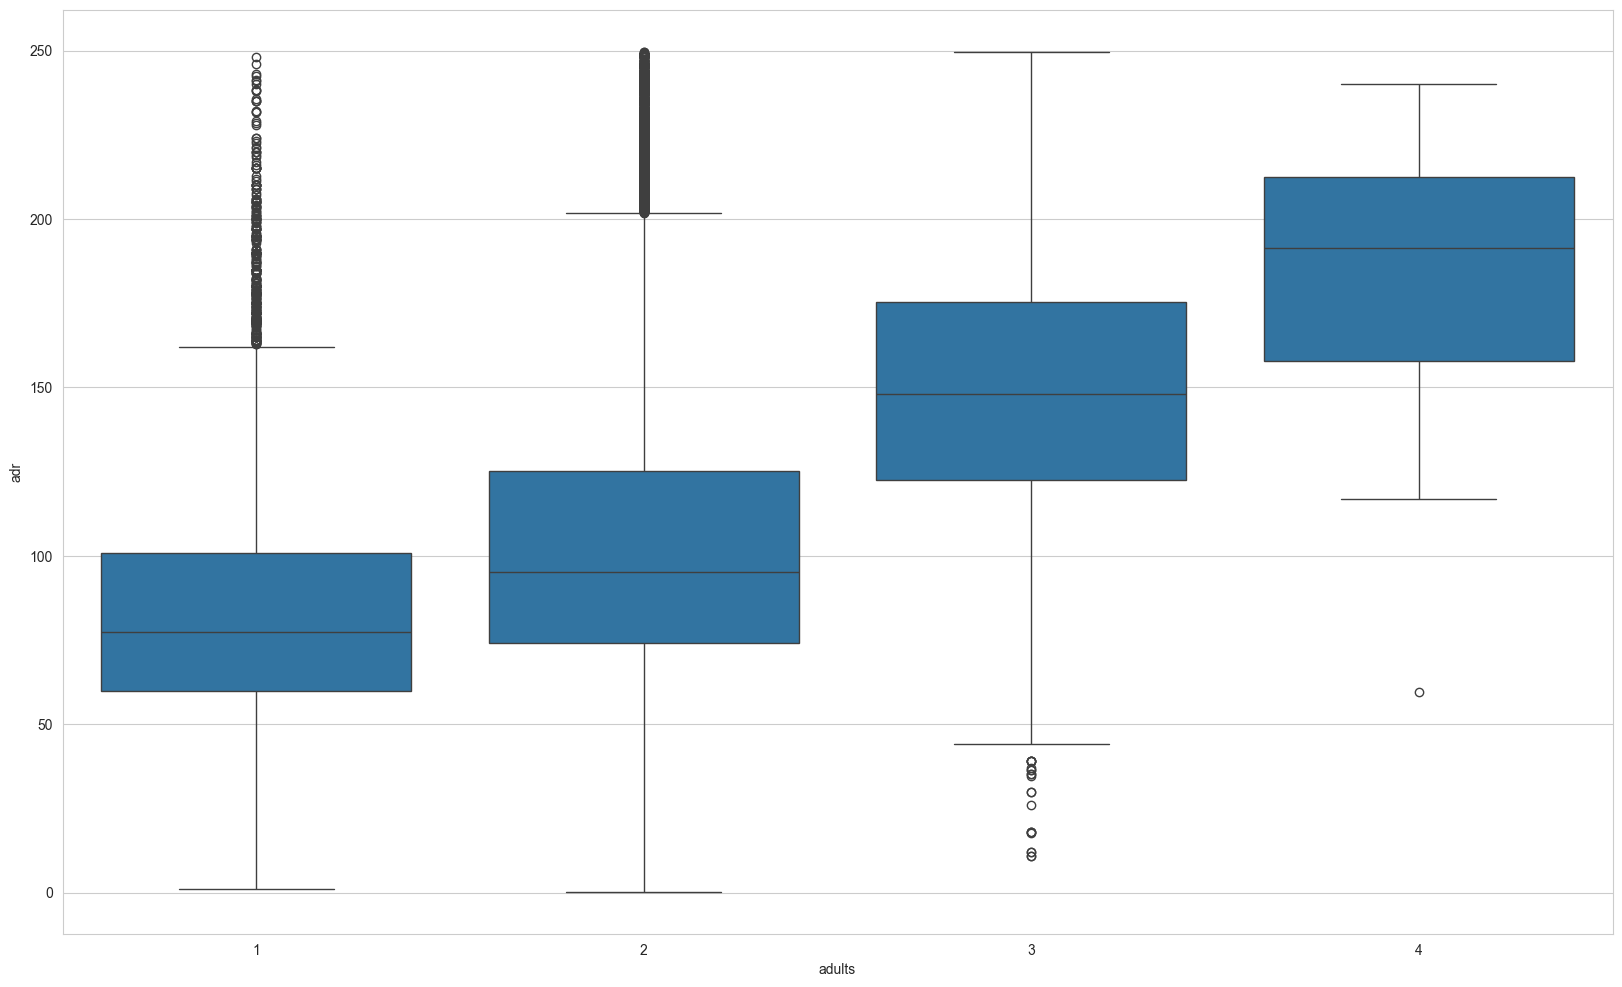

In [379]:
#children y adults son los que parecen tener mas correlacion con el adr
sns.boxplot(data=df, x="adults", y="adr")


<Axes: xlabel='children', ylabel='adr'>

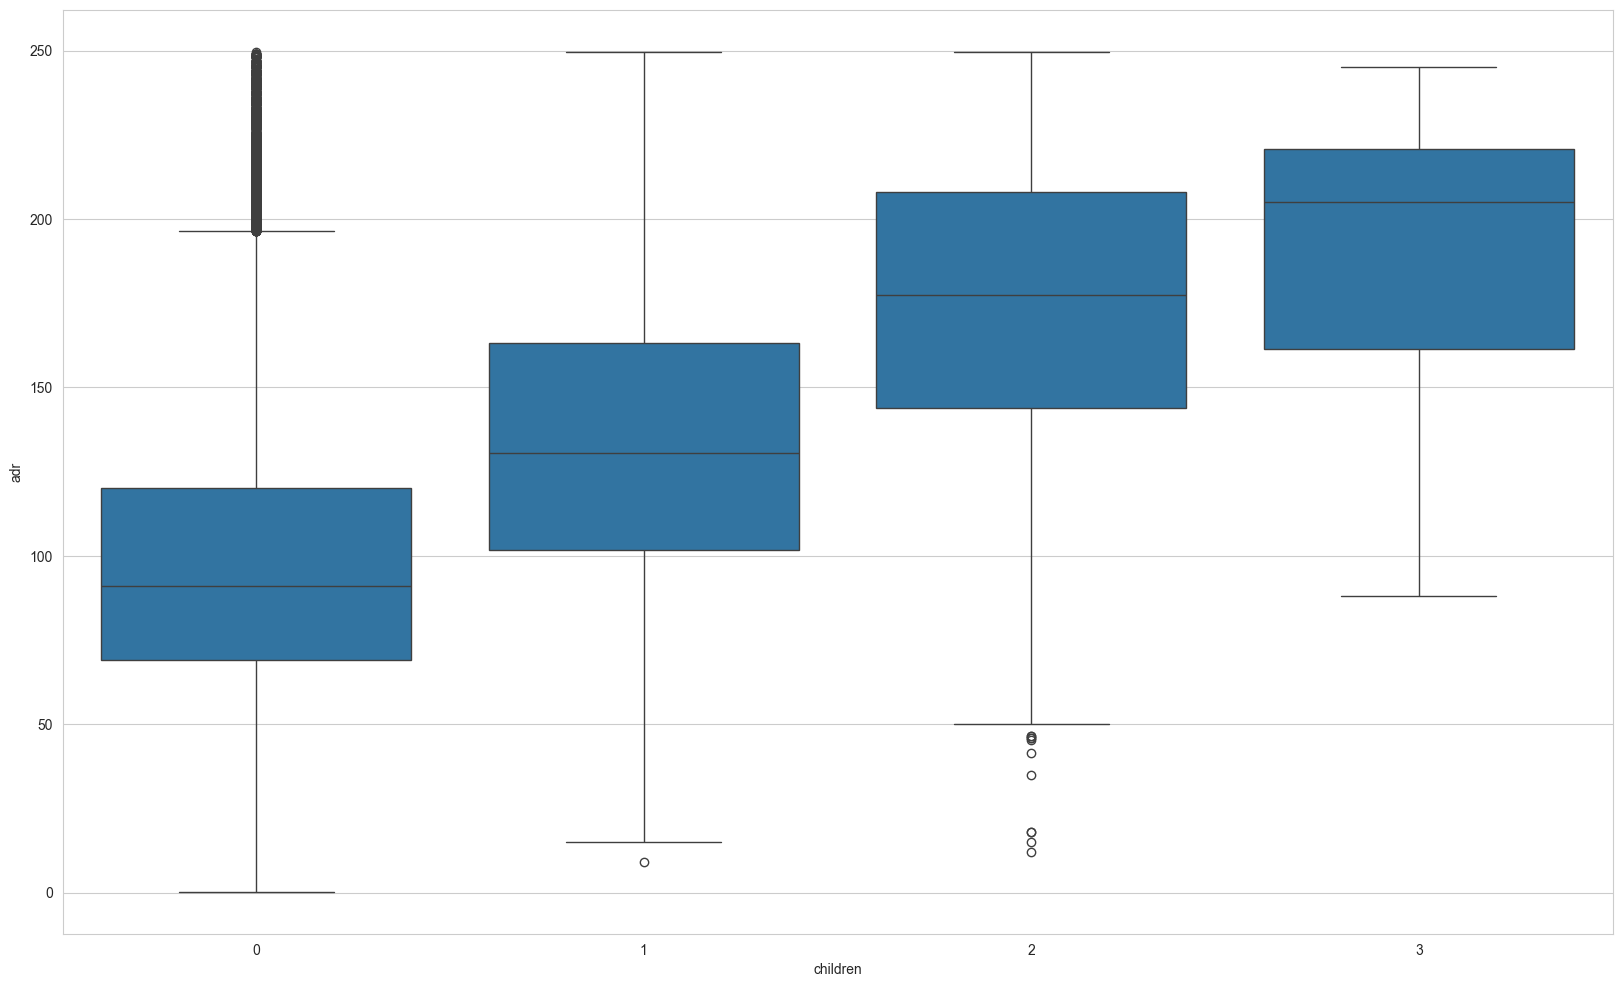

In [380]:
sns.boxplot(data=df, x="children", y="adr")


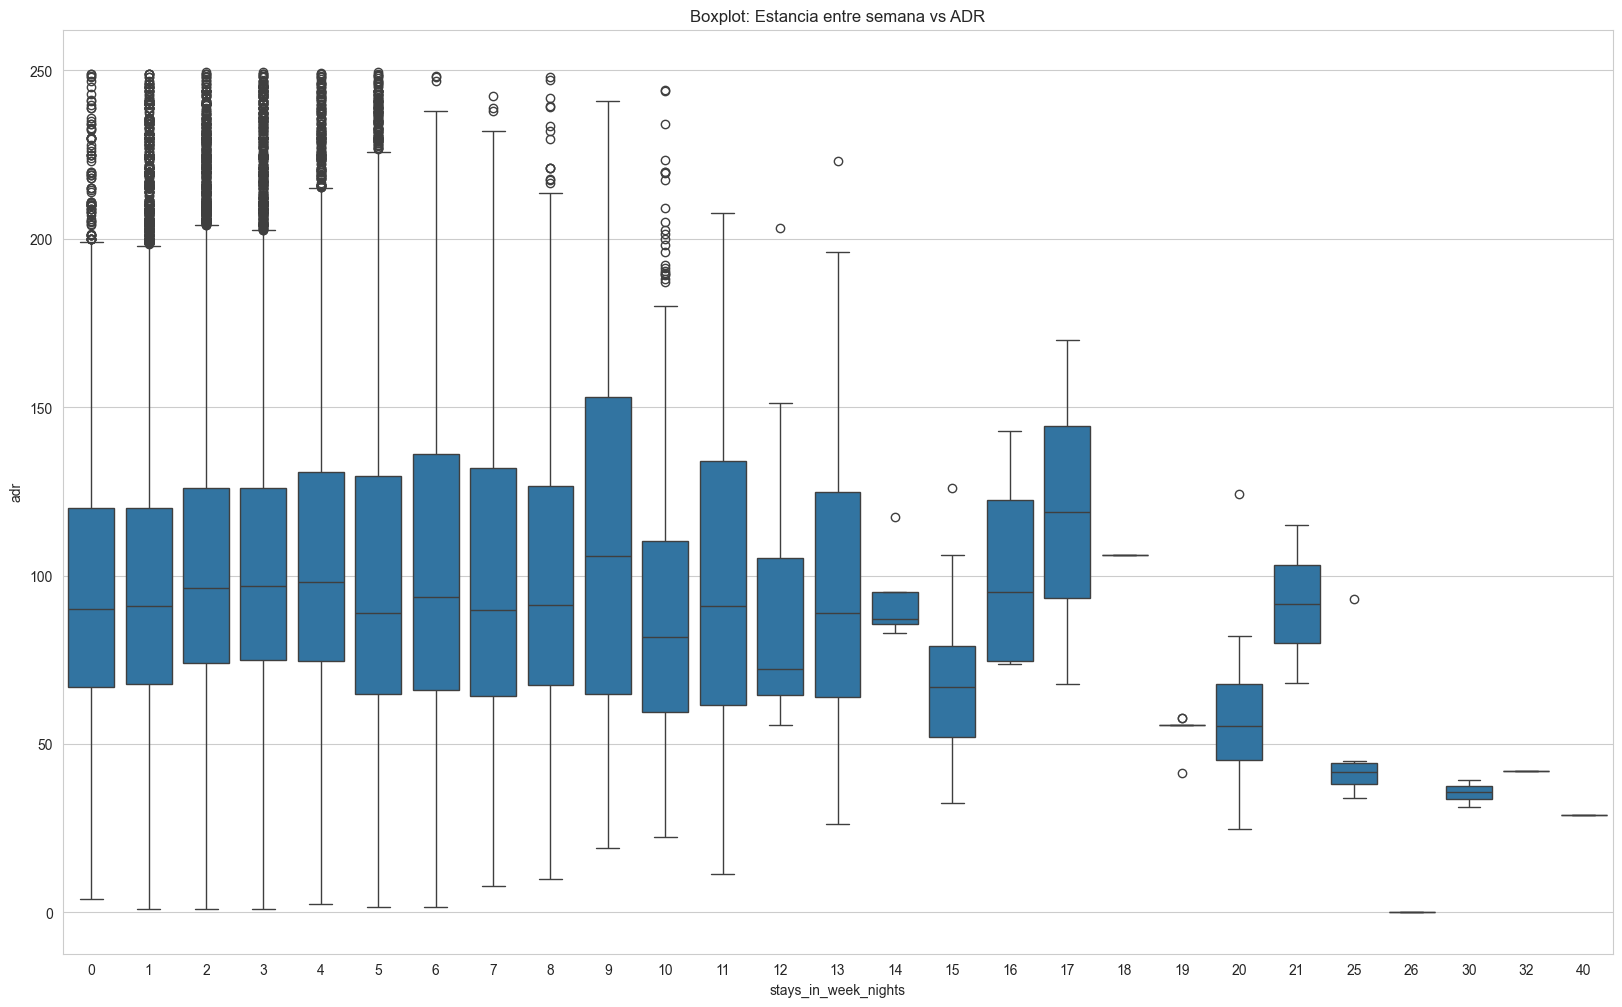

In [381]:
sns.boxplot(data=df, x='stays_in_week_nights', y='adr')
plt.title('Boxplot: Estancia entre semana vs ADR')
plt.show()


In [382]:
# un intervalo de 40 noches no es muy realsita lod ecidimos acortar a 20
df = df[(df['stays_in_week_nights'] >= 0) & (df['stays_in_week_nights'] <= 20)]


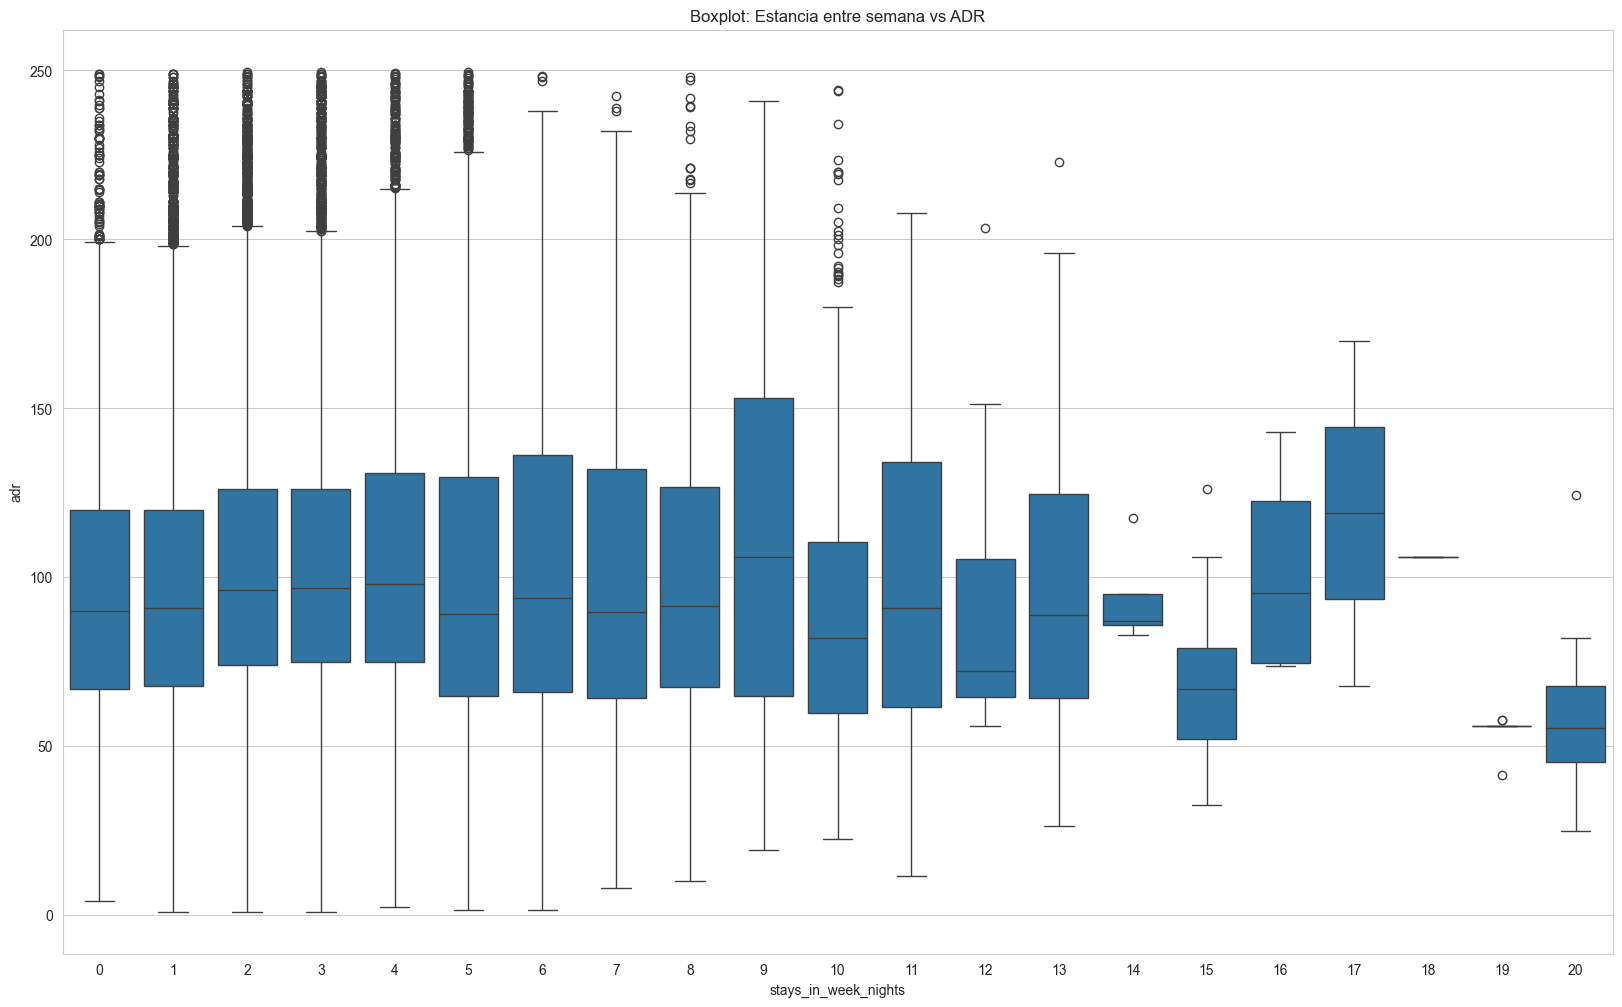

In [383]:
sns.boxplot(data=df, x='stays_in_week_nights', y='adr')
plt.title('Boxplot: Estancia entre semana vs ADR')
plt.show()


In [384]:

total = len(df_original)
limpio = len(df)
eliminados = total - limpio
porcentaje = (eliminados / total) * 100

print(f"Registros eliminados: {eliminados}")
print(f"Porcentaje eliminado: {porcentaje:.2f}%")


Registros eliminados: 7087
Porcentaje eliminado: 9.73%


CATEGORICOS (las categorias de cada uno)

In [385]:
df.select_dtypes(include='object').columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'fechas_estadia'],
      dtype='object')

In [386]:
df.drop('country',axis=1, inplace=True)

In [387]:
df.select_dtypes(include='object').columns

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'fechas_estadia'],
      dtype='object')

In [ ]:
catrgoricas = df.select_dtypes(include=['object'])
catrgoricas.describe().T

In [ ]:
catrgoricas = df.select_dtypes(include=['object'])
for var in catrgoricas:
    print(f"\n{var.upper()}:")
    print(df[var].unique())


HOTEL:
['Resort Hotel' 'City Hotel']

ARRIVAL_DATE_MONTH:
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

MEAL:
['BB' 'FB' 'HB' 'SC' 'Undefined']

MARKET_SEGMENT:
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Groups' 'Complementary'
 'Aviation']

DISTRIBUTION_CHANNEL:
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

RESERVED_ROOM_TYPE:
['A' 'C' 'D' 'G' 'E' 'F' 'H' 'B']

ASSIGNED_ROOM_TYPE:
['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'K']

DEPOSIT_TYPE:
['No Deposit' 'Refundable' 'Non Refund']

CUSTOMER_TYPE:
['Transient' 'Contract' 'Transient-Party' 'Group']


In [ ]:
catrgoricas = df.select_dtypes(include=['object'])

catrgoricas.describe()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
count,65756,65756,65756,65756,65756,65756,65756,65756,65756
unique,2,12,5,7,5,8,10,3,4
top,City Hotel,August,BB,Online TA,TA/TO,A,A,No Deposit,Transient
freq,41564,7272,50531,32877,52957,45732,36614,65545,45911


In [ ]:
categoricas = ['hotel', 'meal', 'customer_type', 'market_segment',
               'distribution_channel', 'reserved_room_type',
               'assigned_room_type', 'deposit_type']

df_dummies = pd.get_dummies(df[categoricas], drop_first=True, dtype=int)

corr = df_dummies.join(df['adr']).corr()['adr'].sort_values(ascending=False)

print(corr)


adr                               1.000000
market_segment_Online TA          0.283727
reserved_room_type_F              0.214439
customer_type_Transient           0.186969
assigned_room_type_F              0.179858
reserved_room_type_D              0.177856
reserved_room_type_G              0.150847
assigned_room_type_G              0.148282
market_segment_Direct             0.135395
meal_HB                           0.119865
reserved_room_type_E              0.106032
distribution_channel_Direct       0.097227
reserved_room_type_C              0.093219
reserved_room_type_H              0.077862
assigned_room_type_E              0.073881
assigned_room_type_H              0.060439
meal_FB                           0.035490
assigned_room_type_D              0.033559
distribution_channel_TA/TO        0.026089
distribution_channel_GDS          0.024467
assigned_room_type_K              0.007363
assigned_room_type_C              0.003782
distribution_channel_Undefined    0.001021
meal_SC    

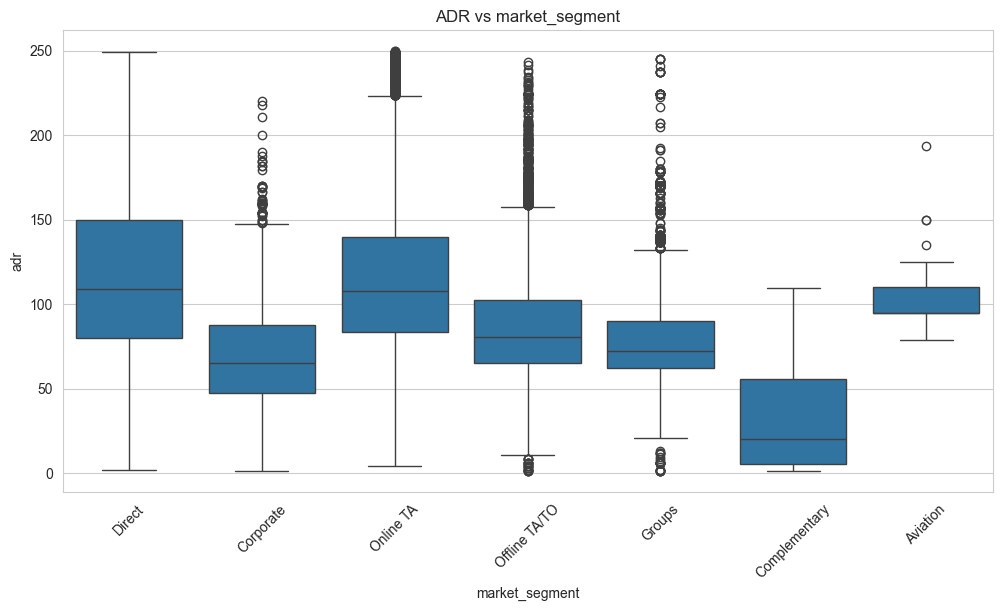

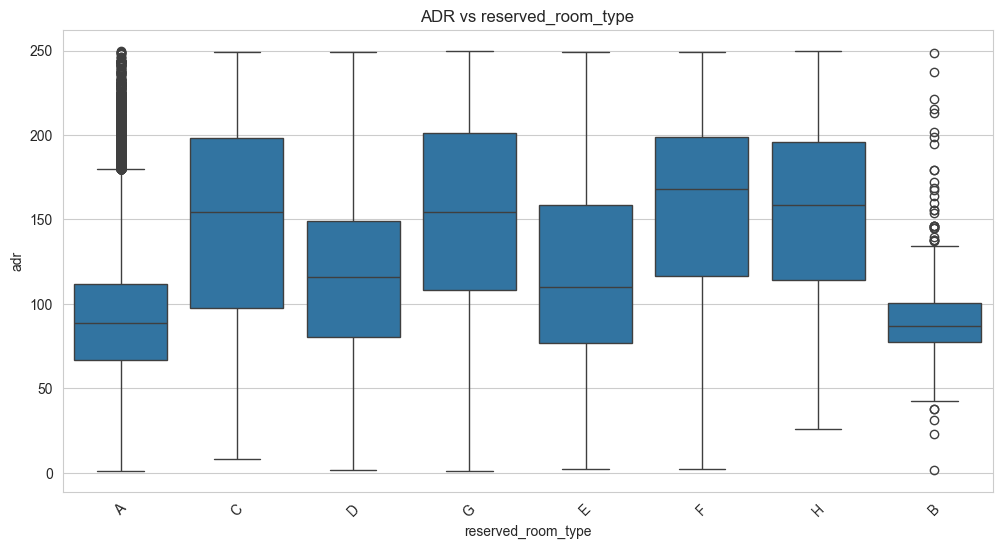

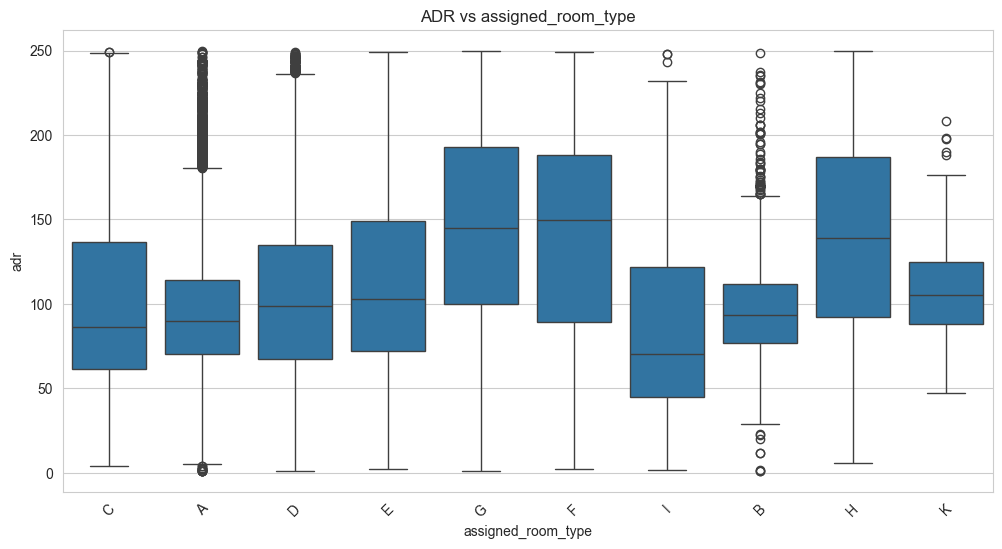

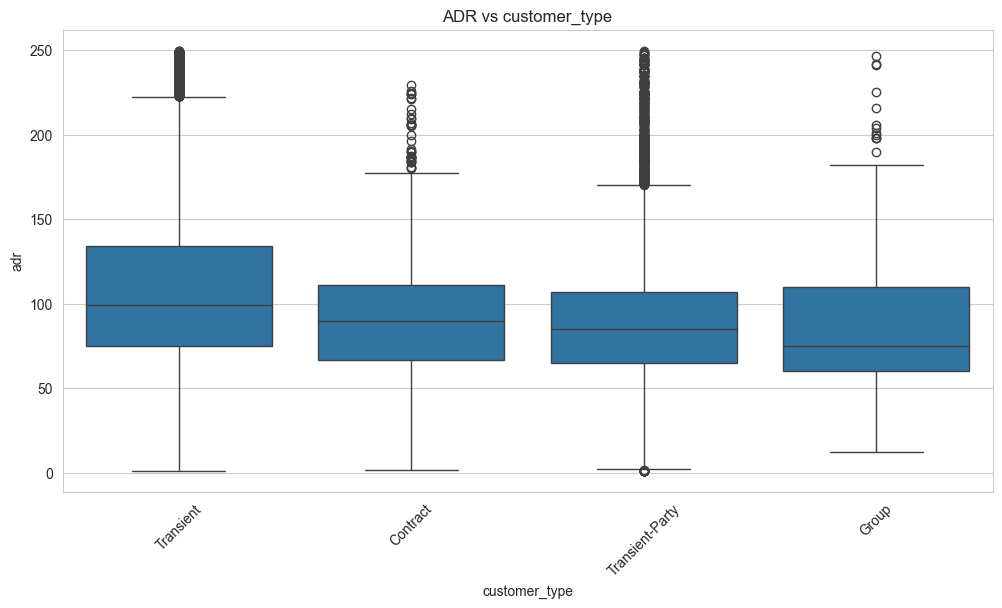

In [ ]:
categorias_principales = [
    "market_segment",
    "reserved_room_type",
    "assigned_room_type",
    "customer_type"
]

for i in categorias_principales:
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df, x=i, y="adr")
    plt.xticks(rotation=45)
    plt.title(f"ADR vs {i}")
    plt.show()
